In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import scipy.stats as st
import math
import statistics
import scipy.stats
from scipy import stats
from scipy.stats import t
from scipy.stats import f
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, shapiro
from statsmodels.stats.stattools import durbin_watson

## MA 541 Group Project

Daniel Roman, Jonathan Amitai, Aditya Nittala, Michelle Hernandez, Vinh Phuong

I pledge my honor that I have abided by the Stevens Honor System.

## Introduction:

The objective of this report was to provide us with practice in order to gain a better understanding of the various mathematical statistical methods that have been introduced throughout the semester. Using Python, data analysis was performed on the provided data file containing four columns, the daily ETF return, the daily relative change in the price of the crude oil, the daily relative change in the gold price, and the daily return of the JPMorgan Chase & Co stock. Various mathematical methods were implemented to analyze the data such as confidence interval hypothesis testing, multiple linear regression and model selection. In doing so, the formulation of our hypotheses were tested and multiple assumptions and conclusions were drawn after performing our analysis.

## Part 1: Meet the Data

In [60]:
data  = pd.read_csv("./test.txt", delim_whitespace=True)
df = pd.DataFrame(data)
print(data)

      Close_ETF       oil      gold       JPM
0     97.349998  0.039242  0.004668  0.032258
1     97.750000  0.001953 -0.001366 -0.002948
2     99.160004 -0.031514 -0.007937  0.025724
3     99.650002  0.034552  0.014621  0.011819
4     99.260002  0.013619 -0.011419  0.000855
..          ...       ...       ...       ...
995  150.570007  0.009752  0.004634  0.003859
996  151.600006 -0.009341 -0.015325  0.018259
997  151.300003  0.036120 -0.006195 -0.007928
998  152.619995  0.001542  0.005778 -0.000381
999  152.539993  0.020330  0.001965  0.000381

[1000 rows x 4 columns]


In [6]:
print("The means for each column are: \n" + str(np.mean(data, axis=0)))

The means for each column are: 
Close_ETF    121.152960
oil            0.001030
gold           0.000663
JPM            0.000530
dtype: float64


In [7]:
for i in range(data.shape[1] - 1):
    for j in range(i + 1, data.shape[1]):
        print("The correlation among " + df.columns[i] + " and " + df.columns[j] + " is " + str(pearsonr(df.iloc[:, i], df.iloc[:, j])[0]))

The correlation among Close_ETF and oil is -0.009044842009622163
The correlation among Close_ETF and gold is 0.02299557007605462
The correlation among Close_ETF and JPM is 0.03680705773259186
The correlation among oil and gold is 0.23565037184144078
The correlation among oil and JPM is -0.12084893009495931
The correlation among gold and JPM is 0.10016984211388416


None of the columns have a strong correlation.

## Part 2: Describe your Data

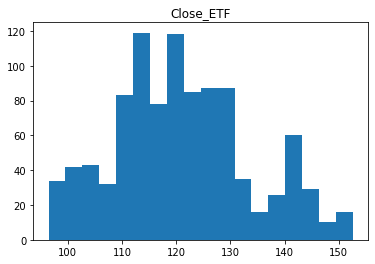

In [8]:
_ = plt.hist(data.iloc[:, 0], bins='auto')
plt.title("Close_ETF")
plt.show()

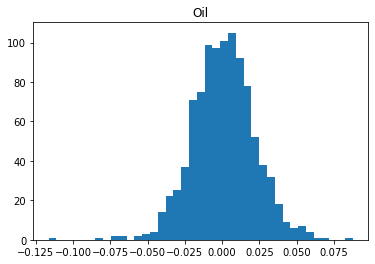

In [9]:
_ = plt.hist(data.iloc[:, 1], bins='auto')
plt.title("Oil")
plt.show()

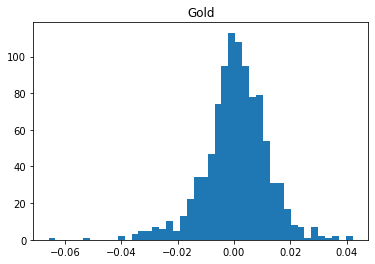

In [10]:
_ = plt.hist(data.iloc[:, 2], bins='auto')
plt.title("Gold")
plt.show()

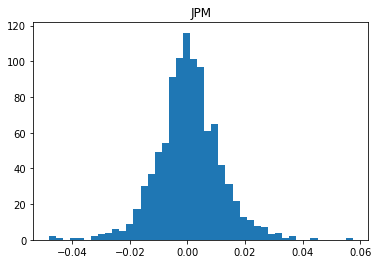

In [11]:
_ = plt.hist(data.iloc[:, 3], bins='auto')
plt.title("JPM")
plt.show()

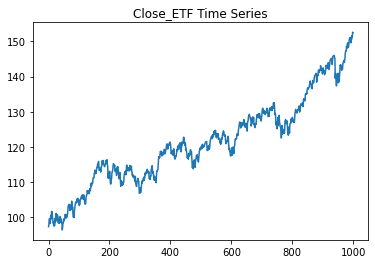

In [12]:
plt.plot(range(1000), df.iloc[:, 0])
plt.title("Close_ETF Time Series")
plt.show()

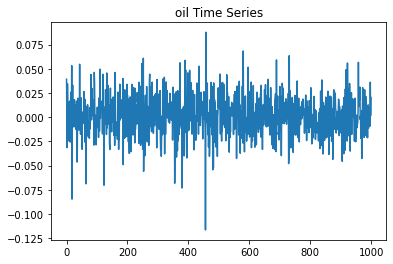

In [13]:
plt.plot(range(1000), df.iloc[:, 1])
plt.title("oil Time Series")
plt.show()

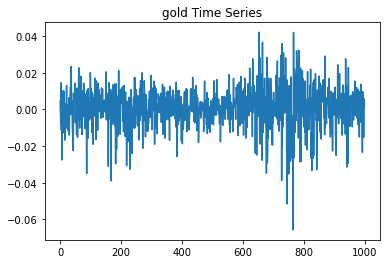

In [14]:
plt.plot(range(1000), df.iloc[:, 2])
plt.title("gold Time Series")
plt.show()

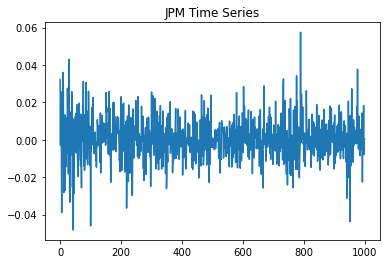

In [15]:
plt.plot(range(1000), df.iloc[:, 3])
plt.title("JPM Time Series")
plt.show()

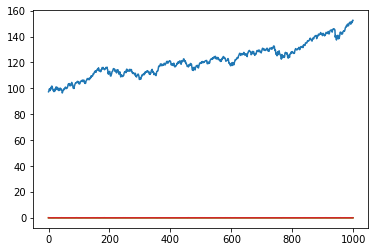

In [16]:
plt.plot(range(1000), df.iloc[:, 0])
plt.plot(range(1000), df.iloc[:, 1])
plt.plot(range(1000), df.iloc[:, 2])
plt.plot(range(1000), df.iloc[:, 3])
plt.show()

The scale of the ETF column is orders of magnitude higher than the other three columns, so it doesn't display well.

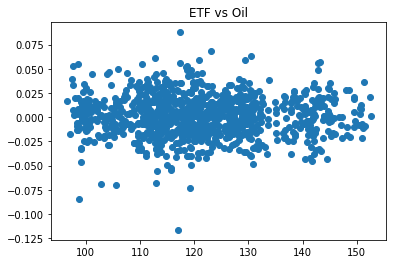

In [17]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title("ETF vs Oil")
plt.show()

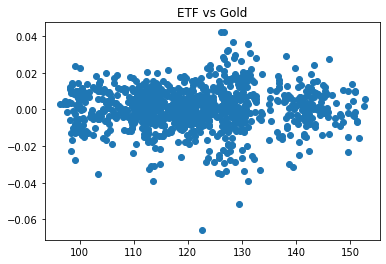

In [18]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 2])
plt.title("ETF vs Gold")
plt.show()

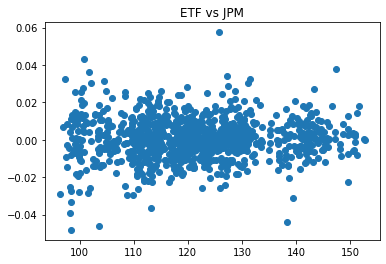

In [19]:
plt.scatter(df.iloc[:, 0], df.iloc[:, 3])
plt.title("ETF vs JPM")
plt.show()

## Part 3: What distribution does your data follow?

Based off of the data, it seems that all four columns are approximately normally distributed. Below is a shapiro-wilkis test
that will test this hypothesis for each one of the columns:

In [20]:
for i in range(4):
    _, p_val = shapiro(df.iloc[:, i])
    print("The P-value is " + str(p_val))
    if p_val > .05:
        print("The data for the " + df.columns[i] + " column is normally distributed")
    else:
        print("The data for the " + df.columns[i] + " column is not normally distributed")

The P-value is 1.1652623310709487e-10
The data for the Close_ETF column is not normally distributed
The P-value is 5.487121939040662e-07
The data for the oil column is not normally distributed
The P-value is 1.0205225065614693e-13
The data for the gold column is not normally distributed
The P-value is 1.5373813333496855e-10
The data for the JPM column is not normally distributed


However, in practice, this is not the case, as is shown above.

## Part 4: Importance of Central Limit Theorem

In [21]:
print("The means are: \n" + str(np.mean(data, axis=0)))
print("The standard deviations are: \n" + str(np.std(data, axis=0)))

The means are: 
Close_ETF    121.152960
oil            0.001030
gold           0.000663
JPM            0.000530
dtype: float64
The standard deviations are: 
Close_ETF    12.563504
oil           0.021082
gold          0.011283
JPM           0.011011
dtype: float64


In [22]:
arrData = data.to_numpy()
arrData = arrData.reshape(50, 20, -1)

50 groups with each group having 20 entries in it:

In [23]:
groupMeansP4n2 = np.mean(arrData, axis=1)
print(groupMeansP4n2)

[[ 9.93210008e+01 -2.01679679e-04 -2.67306095e-03  1.74693895e-03]
 [ 9.95539997e+01  1.48865808e-03  2.78242510e-03  2.47223080e-03]
 [ 9.91540006e+01  2.52443572e-03 -4.26595000e-04 -2.40382160e-03]
 [ 1.02550500e+02 -7.37862501e-03  3.28040530e-03  2.56935945e-03]
 [ 1.03292000e+02  5.79503683e-03 -4.80439100e-04  1.77629315e-03]
 [ 1.05093500e+02  4.86705610e-03  2.15759685e-03 -2.39593280e-03]
 [ 1.06751000e+02  5.72589034e-04  1.83089445e-03  1.12758020e-03]
 [ 1.11658001e+02  2.83596703e-03 -6.03919050e-04  4.86035805e-03]
 [ 1.14499500e+02  1.25845105e-04  1.18044645e-03  1.80576730e-03]
 [ 1.14400500e+02  3.30072924e-03 -1.55996320e-03  8.59690600e-04]
 [ 1.12776500e+02 -7.88817676e-04 -2.59756100e-04 -2.45343010e-03]
 [ 1.12286000e+02  4.95380503e-03 -2.78210215e-03 -4.55481910e-03]
 [ 1.11808999e+02 -1.89678203e-03  1.00277650e-03  2.80066325e-03]
 [ 1.13271499e+02  1.32914053e-03  2.95776015e-03 -1.16442780e-03]
 [ 1.09947499e+02  6.78522966e-03 -8.69664350e-04 -1.09164990e

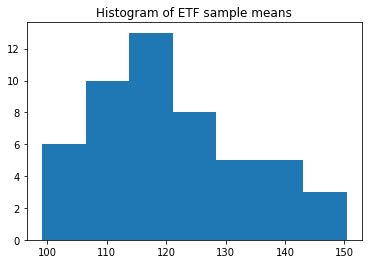

In [24]:
plt.hist(groupMeansP4n2[:, 0], bins='auto')
plt.title("Histogram of ETF sample means")
plt.show()

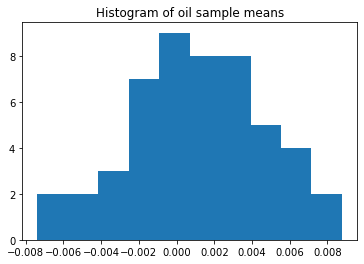

In [25]:
plt.hist(groupMeansP4n2[:, 1])
plt.title("Histogram of oil sample means")
plt.show()

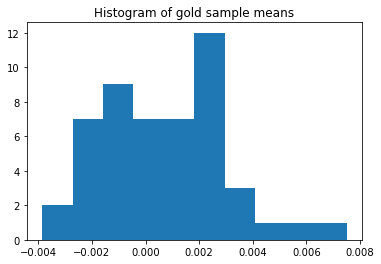

In [26]:
plt.hist(groupMeansP4n2[:, 2])
plt.title("Histogram of gold sample means")
plt.show()

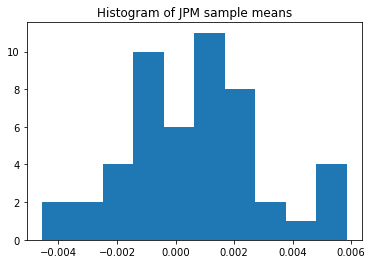

In [27]:
plt.hist(groupMeansP4n2[:, 3])
plt.title("Histogram of JPM sample means")
plt.show()

From what we see here, the data looks like it could be normally distributed, but the histogram does not seem particularly
convincing of the fact.

In [28]:
print("Means of all the samples of 20: ")
print(np.mean(groupMeansP4n2, axis=0)) #(This is identical to the means of the whole data)
print("Standard deviation of all the samples of 20: ")
print(np.std(groupMeansP4n2, axis=0))

Means of all the samples of 20: 
[1.21152960e+02 1.03003549e-03 6.62836082e-04 5.30411021e-04]
Standard deviation of all the samples of 20: 
[1.24891759e+01 3.69619528e-03 2.34214815e-03 2.29456328e-03]


All of these are smaller than what was seen for the entire data, except for the ETF's because these values are approximately the standard deviation of all the data divided by sqrt(50). They might not be 
exact because the sample size of only 50 is quite small. However, the reason this does not apply to the ETF's is because
each day is not independent, since it is constantly increasing (as shown by the time series), so the CLT does not actually
apply here, since it assumes that every random variable that is added (in this case the ETF values) are independent, which
is not the case.

In [29]:
arrData = arrData.reshape(10, 100, -1)
groupMeansP4n6 = np.mean(arrData, axis=1)
print(groupMeansP4n6)

[[ 1.00774300e+02  4.45565190e-04  4.96547070e-04  1.23220015e-03]
 [ 1.10480500e+02  2.34043730e-03  6.01011100e-04  1.25149267e-03]
 [ 1.12018099e+02  2.07651510e-03  9.80281000e-06 -1.29273273e-03]
 [ 1.14517200e+02 -3.80653699e-05  9.10120770e-04  8.53279440e-04]
 [ 1.18400300e+02  1.56926008e-03 -4.35483080e-04 -8.04743290e-04]
 [ 1.21676800e+02  2.63479669e-03  1.19603815e-03 -4.88440740e-04]
 [ 1.25785600e+02 -2.69461953e-04  1.51744823e-03  1.92143318e-03]
 [ 1.28012700e+02  2.56503906e-03  2.03333208e-03  1.09566545e-03]
 [ 1.35392100e+02 -1.93482422e-03 -4.12189060e-04  5.45931590e-04]
 [ 1.44472000e+02  9.11093063e-04  7.11732750e-04  9.90024490e-04]]


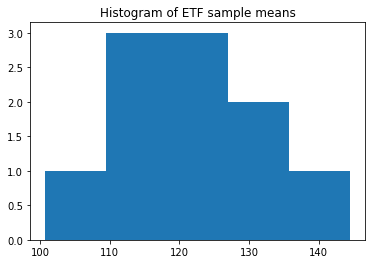

In [30]:
plt.hist(groupMeansP4n6[:, 0], bins='auto')
plt.title("Histogram of ETF sample means")
plt.show()

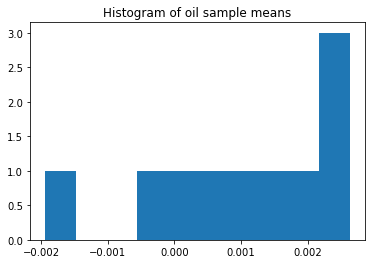

In [31]:
plt.hist(groupMeansP4n6[:, 1])
plt.title("Histogram of oil sample means")
plt.show()

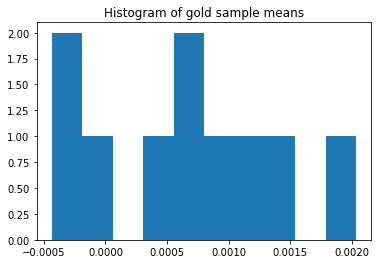

In [32]:
plt.hist(groupMeansP4n6[:, 2])
plt.title("Histogram of gold sample means")
plt.show()

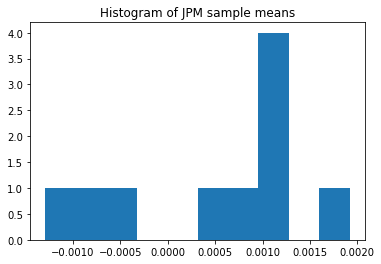

In [33]:
plt.hist(groupMeansP4n6[:, 3])
plt.title("Histogram of JPM sample means")
plt.show()

In [34]:
print("Means of all the samples of 100: ")
print(np.mean(groupMeansP4n6, axis=0)) #(This is identical to the means of the whole data)
print("Standard deviation of all the samples of 100: ")
print(np.std(groupMeansP4n6, axis=0))

Means of all the samples of 100: 
[1.21152960e+02 1.03003549e-03 6.62836082e-04 5.30411021e-04]
Standard deviation of all the samples of 100: 
[1.21637569e+01 1.41457446e-03 7.60024809e-04 9.86265708e-04]


Again, in theory these standard deviation should model the standard deviation of the whole data divided be sqrt(10).
However, the CLT only applies if there are 30 or more samples in the data, and in this case there are only 10. The results
are consistent with the CLT, but only because it does not apply in this case.

In [35]:
arrData = arrData.reshape(1000, -1)
np.random.shuffle(arrData) #(Shuffling the data)

In [36]:
arrData = arrData.reshape(50, 20, -1)
groupMeansP4n8 = np.mean(arrData, axis=1)

In [37]:
print("The mean of each group of 20 is: \n")
print(groupMeansP4n8)

The mean of each group of 20 is: 

[[ 1.21522001e+02  2.08890790e-04  1.50730560e-03  3.15682725e-03]
 [ 1.23996000e+02 -1.99436139e-05 -2.76046500e-05  8.88267900e-04]
 [ 1.20917001e+02 -4.13495389e-03 -9.72452400e-04  2.94292630e-03]
 [ 1.18960500e+02 -4.08734446e-03  1.88938800e-03  1.72337455e-03]
 [ 1.17948000e+02  6.07484205e-03 -3.24079750e-04  2.08098760e-03]
 [ 1.21117000e+02  9.25799270e-03  4.54222855e-03  1.31498230e-03]
 [ 1.17540501e+02  1.82979574e-03  5.03732880e-03  6.23740050e-04]
 [ 1.18774500e+02 -5.81509328e-04 -2.79947235e-03  2.43550000e-03]
 [ 1.21078500e+02  1.29394895e-03  9.03758350e-04 -3.18842500e-04]
 [ 1.20377000e+02  4.91886494e-03  2.00766760e-03  6.53391500e-05]
 [ 1.24803499e+02  1.86983254e-04  2.04533150e-04  2.85948820e-03]
 [ 1.22838999e+02 -4.69506636e-04 -1.13651060e-03  6.67868000e-04]
 [ 1.23455001e+02 -2.79790714e-03  5.15676230e-03 -3.01173950e-04]
 [ 1.20929000e+02 -6.61878856e-04  3.81395500e-04 -1.66376125e-03]
 [ 1.25787501e+02  4.316045

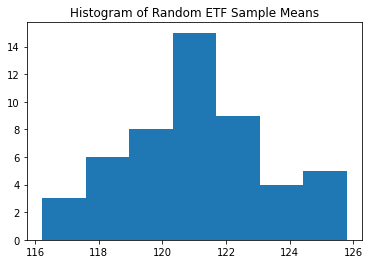

In [38]:
plt.hist(groupMeansP4n8[:, 0], bins='auto')
plt.title("Histogram of Random ETF Sample Means")
plt.show()

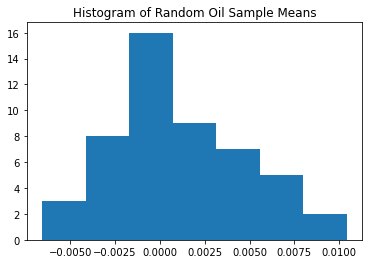

In [39]:
plt.hist(groupMeansP4n8[:, 1], bins='auto')
plt.title("Histogram of Random Oil Sample Means")
plt.show()

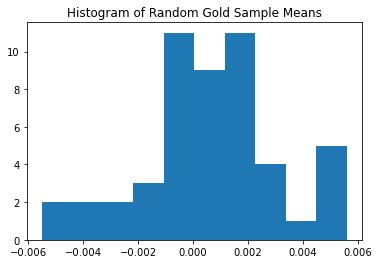

In [40]:
plt.hist(groupMeansP4n8[:, 2], bins='auto')
plt.title("Histogram of Random Gold Sample Means")
plt.show()

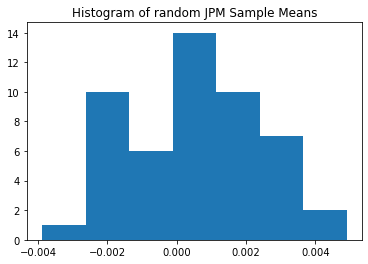

In [41]:
plt.hist(groupMeansP4n8[:, 3], bins='auto')
plt.title("Histogram of random JPM Sample Means")
plt.show()

In [42]:
print("Means of all the samples of 20: ")
print(np.mean(groupMeansP4n8, axis=0)) #This is identical to the means of the whole data
print("Standard deviation of all the samples of 20: ")
print(np.std(groupMeansP4n8, axis=0))

Means of all the samples of 20: 
[1.21152960e+02 1.03003549e-03 6.62836082e-04 5.30411021e-04]
Standard deviation of all the samples of 20: 
[2.24298199e+00 3.81424376e-03 2.41124967e-03 1.80896696e-03]


As seen before, the means of the sample groups are identical to the mean of the population. However, now the sample standard
deviation is a lot closer to what it should be in theory, that is, the population stdev for each column divided by sqrt(50).
Also, the histograms seem to be consistent with the CLT. They definitely look like they are normally distributed. Although
thre are some issues with the sample size (50 is not great), and there are even some empty bins as a result, it does show
that the results are consistent with the CLT.

In [43]:
arrData = arrData.reshape(1000, -1) 
np.random.shuffle(arrData)
arrData = arrData.reshape(10, 100, -1) #(Shuffling again)
groupMeansP4n10 = np.mean(arrData, axis=1)
print("The randomly samples group means of size 100 are: \n")
print(groupMeansP4n10)

The randomly samples group means of size 100 are: 

[[ 1.20734900e+02 -9.45329310e-04  2.80622800e-05 -1.01703540e-04]
 [ 1.19656900e+02  9.18863952e-04 -1.30812514e-03  7.13677610e-04]
 [ 1.21277700e+02 -7.14907532e-04  2.64577350e-04 -1.30341355e-03]
 [ 1.21353200e+02  1.86891795e-03  7.40890530e-04 -3.33788600e-05]
 [ 1.21498500e+02  8.32444703e-04  1.38809522e-03  2.37551900e-04]
 [ 1.21063400e+02  2.01205682e-04  1.21144527e-03  1.63336623e-03]
 [ 1.20297900e+02  2.08114862e-03  1.40240097e-03 -3.49202250e-04]
 [ 1.21926801e+02  1.42233638e-03 -1.44044076e-03  3.71752960e-04]
 [ 1.21112400e+02  3.41599114e-03  5.69611850e-04  2.56275251e-03]
 [ 1.22607900e+02  1.21968336e-03  3.77184325e-03  1.57270720e-03]]


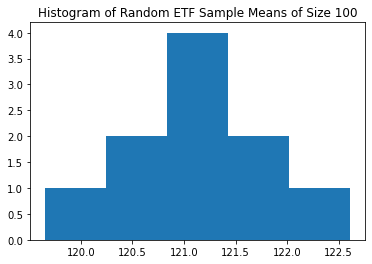

In [44]:
plt.hist(groupMeansP4n10[:, 0], bins='auto')
plt.title("Histogram of Random ETF Sample Means of Size 100")
plt.show()

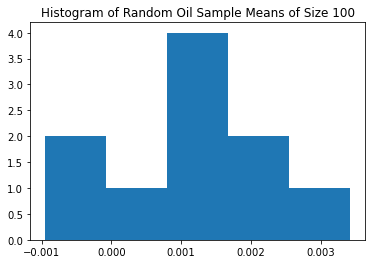

In [45]:
plt.hist(groupMeansP4n10[:, 1], bins='auto')
plt.title("Histogram of Random Oil Sample Means of Size 100")
plt.show()

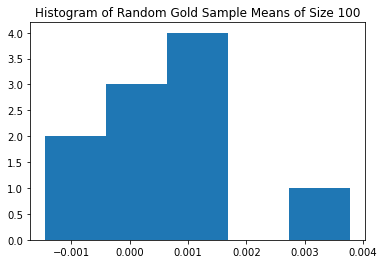

In [46]:
plt.hist(groupMeansP4n10[:, 2], bins='auto')
plt.title("Histogram of Random Gold Sample Means of Size 100")
plt.show()

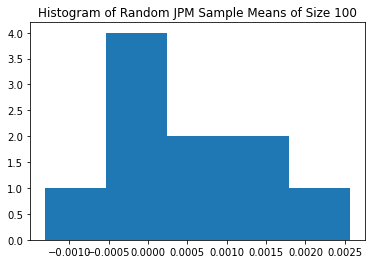

In [47]:
plt.hist(groupMeansP4n10[:, 3], bins='auto')
plt.title("Histogram of Random JPM Sample Means of Size 100")
plt.show()

In [48]:
print("Means of all the samples of 100: ")
print(np.mean(groupMeansP4n10, axis=0)) #This is identical to the means of the whole data
print("Standard deviation of all the samples of 100: ")
print(np.std(groupMeansP4n10, axis=0))

Means of all the samples of 100: 
[1.21152960e+02 1.03003549e-03 6.62836082e-04 5.30411021e-04]
Standard deviation of all the samples of 100: 
[0.77746361 0.00124002 0.00141155 0.0010692 ]


Again, in theory these standard deviation should model the standard deviation of the whole data divided be sqrt(10).
However, the CLT only applies if there are 30 or more samples in the data, and in this case there are only 10. The results
are consistent with the CLT, but only because it does not apply in this case.

The distribution of the population values has an effect on the distribution of the sample means. If there is a ton of spread
in the population values, then there will also be a lot of spread in the sample means. This is backed up by the fact that
the sample means stdev = population stdev divided by sqrt(# of samples), so therefore, the population distribution has an
impact on the sample means distribution.

## Part 5: Constructing Confidence Intervals 

In [49]:
print('1.) The simple random sample from Step 10 of Part 4 that we used is: \n \n', groupMeansP4n10[0])

1.) The simple random sample from Step 10 of Part 4 that we used is: 
 
 [ 1.2073490e+02 -9.4532931e-04  2.8062280e-05 -1.0170354e-04]


In [50]:
print('The 95% confidence interval of μ of this simple random sample is:')

st.t.interval(alpha = 0.95, df = len(groupMeansP4n10[0]) - 1, loc = np.mean(groupMeansP4n10[0]), scale=st.sem(groupMeansP4n10[0]))

The 95% confidence interval of μ of this simple random sample is:


(-65.87488405870984, 126.2418245484247)

In [51]:
print('2.) The simple random sample from Step 8 of Part 4 that we used is: \n \n', groupMeansP4n8[0])

2.) The simple random sample from Step 8 of Part 4 that we used is: 
 
 [1.21522001e+02 2.08890790e-04 1.50730560e-03 3.15682725e-03]


In [52]:
print('The 95% confidence interval of μ of this simple random sample is:')

st.t.interval(alpha = 0.95, df = len(groupMeansP4n8[0]) - 1, loc = np.mean(groupMeansP4n8[0]), scale=st.sem(groupMeansP4n8[0]))

The 95% confidence interval of μ of this simple random sample is:


(-66.30129966896651, 127.06473643078643)

3.) From Part 1, the mean μ of the population (the entire ETF column) was 121.152960, which does fall into both confidence intervals that were calculated from part 5. The u from Part 1 is more accurate, as n is only equal to 4 when calculating the confidence intervals, while n is much larger in Part 1.

## Part 6: Forming Hypothesis and Testing it with Data

1):

Hypothesis Test:

H0: μ = 100

Ha: μ ≠ 100

In [53]:
P6n1originalmean = 100
P6n1mean = np.mean(groupMeansP4n10[0])
P6n1num = len(groupMeansP4n10[0])
P6n1sigmanumerator = 0
for i in range(0, P6n1num):
    P6n1sigmanumerator += (groupMeansP4n10[0][i] - P6n1mean)**2
P6n1sigma = math.sqrt(P6n1sigmanumerator/P6n1num)
P6n1TestStatistic = (P6n1mean - P6n1originalmean)/(P6n1sigma/math.sqrt(P6n1num))
print('The mean of this sample is:', P6n1mean)
print('The population standard deviation of this sample is:', P6n1sigma)
print('The Z-Score Test Statistic for this Hypothesis Test is:', P6n1TestStatistic)

The mean of this sample is: 30.183470244857432
The population standard deviation of this sample is: 52.27989231710535
The Z-Score Test Statistic for this Hypothesis Test is: -2.670875040509578


Because this is a Two-Tailed Hypothesis Test with a significance level of 0.05, the the crticial region range on the normal bell curve (with mean 0 and standard deviation 1) is Z < -1.96 and Z > 1.96. Since the Z-Score for this Hypothesis Test was -2.670875040509578, which DOES fall in the critical region range. As a result of the Z-Score falling in one of the tails, the null hypothesis can be rejected, and as a result, there is sufficient evidence to support the claim that μ is not equal to 100.

2):

Hypothesis Test:

H0: μ = 100

Ha: μ ≠ 100

In [54]:
P6n2originalmean = 100
P6n2mean = np.mean(groupMeansP4n8[0])
P6n2num = len(groupMeansP4n8[0])
P6n2sigmanumerator = 0
for i in range(0, P6n2num):
    P6n2sigmanumerator += (groupMeansP4n8[0][i] - P6n2mean)**2
P6n2sigma = math.sqrt(P6n2sigmanumerator/P6n2num)
P6n2TestStatistic = (P6n2mean - P6n2originalmean)/(P6n2sigma/math.sqrt(P6n2num))
print('The mean of this sample is:', P6n2mean)
print('The population standard deviation of this sample is:', P6n2sigma)
print('The Z-Score Test Statistic for this Hypothesis Test is:', P6n2TestStatistic)

The mean of this sample is: 30.381718380909955
The population standard deviation of this sample is: 52.61986642584595
The Z-Score Test Statistic for this Hypothesis Test is: -2.646083555426692


Because this is a Two-Tailed Hypothesis Test with a significance level of 0.05, the the crticial region range on the normal bell curve (with mean 0 and standard deviation 1) is Z < -1.96 and Z > 1.96. Since the Z-Score for this Hypothesis Test was -2.646083555426692, which DOES fall in the critical region range. As a result of the Z-Score falling in one of the tails, the null hypothesis can be rejected, and as a result, there is sufficient evidence to support the claim that μ is not equal to 100.

3):

Hypothesis Test:

H0: σ = 15

Ha: σ ≠ 15

In [55]:
P6n3originalsigma = 15
P6n3stdev = statistics.stdev(groupMeansP4n8[0])
P6n3length = len(groupMeansP4n8[0])
P6n3degreeoffreedom = P6n3length - 1
print('The sample standard deviation of the sample we used was:', P6n3stdev)
print('For this sample, n = ',P6n3length, '. As a result, the degree of freedom is', P6n3degreeoffreedom, '(From n - 1)')
P6n3teststatistic = ((P6n3degreeoffreedom)*(P6n3stdev**2))/(P6n3originalsigma**2)
print('The test statistic for this chi-squared hypothesis test is: ', P6n3teststatistic)
P6n3pvalue = stats.chi2.cdf(P6n3teststatistic, P6n3degreeoffreedom)
print('As a result, the p-value for this hypothesis test is:', 2*P6n3pvalue, '(It is multiplied by 2 in this question because it is a two-tailed hypothesis test.)')

The sample standard deviation of the sample we used was: 60.760188091368626
For this sample, n =  4 . As a result, the degree of freedom is 3 (From n - 1)
The test statistic for this chi-squared hypothesis test is:  49.224006091979916
As a result, the p-value for this hypothesis test is: 1.99999999976624 (It is multiplied by 2 in this question because it is a two-tailed hypothesis test.)


The p-value in this hypothesis test is way larger than the significance level of 0.05. As a result, there is a failure to reject the null hypothesis, and there is insufficient evidence to support the claim that the population standard deviation is not equal to 15.

4):

Hypothesis Test:

H0: σ = 15

Ha: σ < 15

In [56]:
P6n4originalsigma = 15
P6n4stdev = statistics.stdev(groupMeansP4n8[0])
P6n4length = len(groupMeansP4n8[0])
P6n4degreeoffreedom = P6n4length - 1
print('The sample standard deviation of the sample we used was:', P6n4stdev)
print('For this sample, n = ',P6n4length, '. As a result, the degree of freedom is', P6n4degreeoffreedom, '(From n - 1)')
P6n4teststatistic = ((P6n4degreeoffreedom)*(P6n4stdev**2))/(P6n4originalsigma**2)
print('The test statistic for this chi-squared hypothesis test is: ', P6n4teststatistic)
P6n4pvalue = stats.chi2.cdf(P6n4teststatistic, P6n4degreeoffreedom)
print('As a result, the p-value for this hypothesis test is:', P6n4pvalue, '(It is not multiplied by 2 in this question because it is a one-tailed hypothesis test.)')

The sample standard deviation of the sample we used was: 60.760188091368626
For this sample, n =  4 . As a result, the degree of freedom is 3 (From n - 1)
The test statistic for this chi-squared hypothesis test is:  49.224006091979916
As a result, the p-value for this hypothesis test is: 0.99999999988312 (It is not multiplied by 2 in this question because it is a one-tailed hypothesis test.)


Despite the fact that this hypothesis test was not two-tailed, and the p-value was not multiplied by 2, it is still greater than the significance level of 0.05. As a result, once again, there is a failure to reject the null hypothesis, and there is now insufficient evidence to support the claim that the population standard deviation is less than 15.

## Part 7: Comparing Data

1):

Hypothesis Test:

H0: μ 1 - μ 2 = 0

Ha: μ 1 - μ 2 ≠ 0

(Where μ 1 is gold and μ 2 is oil.)

In [61]:
gold = df['gold']
print(gold)
goldlist = []
for i in range(0, 1000):
    goldlist.append(gold[i])

0      0.004668
1     -0.001366
2     -0.007937
3      0.014621
4     -0.011419
         ...   
995    0.004634
996   -0.015325
997   -0.006195
998    0.005778
999    0.001965
Name: gold, Length: 1000, dtype: float64


In [62]:
goldmean = np.mean(gold)
goldstdev = statistics.stdev(gold)
goldnum = len(goldlist)
print("The mean of gold is: ", goldmean)
print("The standard deviation of gold is: ", goldstdev)
print("For the gold column, n =", goldnum)

The mean of gold is:  0.0006628360819999998
The standard deviation of gold is:  0.011289060259316142
For the gold column, n = 1000


In [63]:
oil = df['oil']
print(oil)
oillist = []
for i in range(0, 1000):
    oillist.append(oil[i])

0      0.039242
1      0.001953
2     -0.031514
3      0.034552
4      0.013619
         ...   
995    0.009752
996   -0.009341
997    0.036120
998    0.001542
999    0.020330
Name: oil, Length: 1000, dtype: float64


In [64]:
oilmean = np.mean(oil)
oilstdev = statistics.stdev(oil)
oilnum = len(oillist)
print("The mean of oil is: ", oilmean)
print("The standard deviation of oil is: ", oilstdev)
print("For the oil column, n =", oilnum)

The mean of oil is:  0.001030035493746981
The standard deviation of oil is:  0.021092898551005324
For the oil column, n = 1000


In [65]:
P7n1teststat = (goldmean - oilmean)/(math.sqrt(((goldstdev**2)/goldnum) + ((oilstdev**2)/oilnum)))
print("The test statistic of this hypothesis test is:", P7n1teststat)

The test statistic of this hypothesis test is: -0.4853666138235811


In [66]:
P7n1degreefreedomnumerator = (((goldstdev**2)/goldnum)**2)+(((oilstdev**2)/oilnum)**2)
P7n1degreefreedomdenominator = ((((goldstdev**2)/goldnum)**2)/(goldnum - 1)) + ((((oilstdev**2)/oilnum)**2)/(oilnum - 1))
P7n1degreefreedom = math.ceil(P7n1degreefreedomnumerator/P7n1degreefreedomdenominator)
print('The overall degree of freedom for this hypothesis test is: ' , P7n1degreefreedom)

The overall degree of freedom for this hypothesis test is:  999


In [67]:
P7n1pvalue = t.cdf(P7n1teststat, P7n1degreefreedom)
print('The p-value of this hypothesis test is:', P7n1pvalue*2)

The p-value of this hypothesis test is: 0.6275227330113681


Because the p-value of this hypothesis test is greater than the significance level of 0.05, we do not reject the null hypothesis, and therefore, there is insufficient evidence to support the claim that the means of gold and oil are the same.

2.) of Part 7:

In [68]:
P7n2diff = oil - gold
print(P7n2diff)
P7n2difflist = []
for i in range(0, 1000):
    P7n2difflist.append(P7n2diff[i])

0      0.034574
1      0.003320
2     -0.023577
3      0.019931
4      0.025038
         ...   
995    0.005118
996    0.005984
997    0.042315
998   -0.004235
999    0.018364
Length: 1000, dtype: float64


Hypothesis Test:

H0: μ 1 - μ 2 = 0

Ha: μ 1 - μ 2 ≠ 0

(Where μ 1 is  new gold difference and μ 2 is oil.)

In [69]:
P7n2diffmean = np.mean(P7n2diff)
P7n2diffstdev = statistics.stdev(P7n2diff)
P7n2diffnum = len(P7n2difflist)
print("The mean of the new difference column is: ", P7n2diffmean)
print("The standard deviation of the new difference column is: ", P7n2diffstdev)
print('For the new column, n =', P7n2diffnum)

The mean of the new difference column is:  0.00036719941174697996
The standard deviation of the new difference column is:  0.021450584787446547
For the new column, n = 1000


In [70]:
P7n2teststat = (P7n2diffmean - oilmean)/(math.sqrt((P7n2diffstdev**2)/P7n2diffnum) + ((oilstdev**2)/oilnum))
print("The test statistic of this hypothesis test is:", P7n2teststat)

The test statistic of this hypothesis test is: -0.9765224847342427


In [71]:
P7n2degreefreedomnumerator = (((P7n2diffstdev**2)/P7n2diffnum)**2)+(((oilstdev**2)/oilnum)**2)
P7n2degreefreedomdenominator = ((((P7n2diffstdev**2)/P7n2diffnum)**2)/(goldnum - 1)) + ((((oilstdev**2)/oilnum)**2)/(oilnum - 1))
P7n2degreefreedom = math.ceil(P7n1degreefreedomnumerator/P7n1degreefreedomdenominator)
print('The overall degree of freedom for this hypothesis test is: ' , P7n2degreefreedom)

The overall degree of freedom for this hypothesis test is:  999


In [72]:
P7n2pvalue = t.cdf(P7n2teststat, P7n2degreefreedom)
print('The p-value of this hypothesis test is:', P7n2pvalue*2)

The p-value of this hypothesis test is: 0.3290420145492212


Because the p-value of this hypothesis test is greater than the significance level of 0.05, we do not reject the null hypothesis, and therefore, there is insufficient evidence to support the claim that the means of the new gold difference and oil are the same.

3.) of Part 7:

Hypothesis Test:

H0: s1 - s2 = 0

Ha: s1 - s2 ≠ 0

(Where s1 is gold and s2 is oil.)

In [73]:
P7n3F = (goldstdev/oilstdev)**2
print('The F test statistic for this hypothesis test is:', P7n3F)
P7n3df1 = oilnum - 1
P7n3df2 = goldnum - 1
print('The lower degree of freedom is:', P7n3df1)
print('The upper degree of freedom also is:', P7n3df2)

The F test statistic for this hypothesis test is: 0.286446193069971
The lower degree of freedom is: 999
The upper degree of freedom also is: 999


In [74]:
P7n3pvalue = scipy.stats.f.cdf(P7n3F, P7n3df1, P7n3df2)
print(P7n3pvalue*2)

7.884599591788351e-82


This p-value is definitely very small, and a lot smaller than the significance level of 0.05, therefore, the null hypothesis is rejected, and there is sufficient evidence to support the claim that the gold and oil standard deviations are not equal.

## Part 8: Fitting the line to the Data:

1.) Scatter Plot:

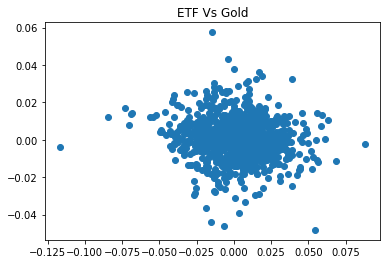

In [75]:
P8n1 = plt.scatter(data.iloc[:, 1],data.iloc[:,3])
plt.title("ETF Vs Gold")
plt.show()

As can be observed there is no linear relationship between the two quantities

2.) Calculation of coefficient of correlation:

In [76]:
etf = df["Close_ETF"]
corrcoff = stats.pearsonr(gold, etf)
print("The correlation coefficient is: ", corrcoff[0])

The correlation coefficient is:  0.02299557007605462


As the correlation is positive and greater than '0' we see that as the value of Gold increases, there is a corresponding increase in ETF.

3.) Fitting a regression line:

The slope is:  25.604389324427306 The intercept is:  121.13598849889819
The best fit line is: y =  25.604389324427306 *x +  121.13598849889819


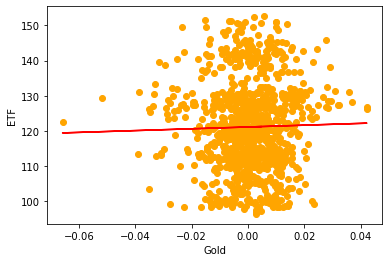

In [77]:
slope, intercept,rval,pval,_ = stats.linregress(gold,etf)
print("The slope is: ",slope,"The intercept is: ", intercept)
print("The best fit line is: y = ", slope,"*x + ", intercept)

plt.scatter(gold,etf,color = 'orange')
plt.plot(gold,intercept + gold*slope,'r',label='fitted line')
plt.xlabel("Gold")
plt.ylabel("ETF")
plt.show()

4.) Two-tailed t test:

Hypothesis Test:

H0: β_1 = 0

Ha: β_1 ≠ 0

In [78]:
P8n4dense = 0
P8n4numse = 0
for i in range(0, goldnum):
  P8n4dense += (gold[i] - np.mean(gold))**2
  P8n4numse += (etf[i] - (slope*gold[i] + intercept))**2

P8n4se = np.sqrt((P8n4numse/(goldnum - 2))/P8n4dense)

test_stat = slope/P8n4se
print("The test Statistic is: ",test_stat)
print("The p-value is: ",pval)

The test Statistic is:  0.7266483774835961
The p-value is:  0.46761178061829356


As the p-value is not less than the significance value of 0.01, we fail to reject the null hypothesis β_1 = 0, and as a result, there is insufficient evidence to conclude that the ETF(Y) and Gold(X) have a linear relationship.

5.) Is it a good model?

In [79]:
rsquare = rval**2
print("The coefficient of determination is: ", rsquare, "(Or in terms of Percentage, it is:", rsquare * 100,'%)')

The coefficient of determination is:  0.0005287962431227392 (Or in terms of Percentage, it is: 0.052879624312273915 %)


The extremely low coefficient of determination shows that the model is not good for the data as most of the points cannot be plotted closest to the regression line. (An explanation on how this model could have been better and how it can be improved is explained in the next part of this question.) 

6.) What are the assumptions for model fitting?

For this model, the assumptions that we made were that the observations were independent, the relationship between x and y was linear, x and y were normally distributed. In response to number 5 in this question when determining the coefficient of determination, we discovered that it was incredibly small, and basically very close to 0. Once again, this model is not a good model for this exact reasoning. As a result, the higher the adjusted R-squared is on the data set, the better the model will be.

In order to increase the adjusted R-squared to improve the model, what should be done is checking the normality of the data by plotting a density curve of it. The goal to making this curve as normal as possible should be to see if the curve has any significant bumps or gaps on it, as well as if it is skewed to the left or right in any way. If the model is not a good model, there will be a way to apply a transformation onto the data such that the density curve will have less bumps and/or display less skewedness.

There are many ways to apply these specific transformations and they could be applied on either the independent or dependent variable. They include:

-Taking the square root of every element (if possible)

-Taking the absolute value of every element

-Taking the natural log of every element (if possible)

-Taking the sine value of every element (if possible)

-Normalizing the data using the variable's mean, standard deviation, and the normalization formula

If any of these transformations can normalize the data such that a new linear regression model has a brand new p-value that is lower than the significance level, and as a result, the adjusted R-squared will be greater too, improving the model!

7.) Confidence and Prediction Interval:

To calculate the confidence interval of Mean daily ETF, we used:

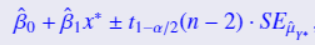

where t_(1 - α/2) with respect to 998 degrees of freedom is equal to 2.581. We also used:

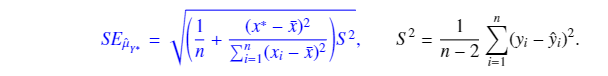

And to calculate prediction intervals of the individual daily ETF return, we used:

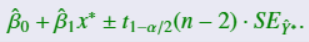

where t_(1 - α/2) is equal to 2.581 again. We also used:

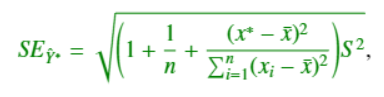

In [80]:
temp = 0

for i in range(1,1000):
  temp += (gold[i] - np.mean(gold))**2
temp2 = (0.005127 - np.mean(gold))**2
temp3 = temp2/temp
temp4 = temp3 + 1/1000

ssquare = 0 
for i in range(1,1000):
  ssquare += (etf[i] - (intercept  + slope*gold[i]))**2

temp5 = ssquare * (1/998)
tempfin = (np.sqrt(temp5 * temp4)) * 2.581


conintlb = intercept + slope*0.005127 - tempfin
conintub = intercept + slope*0.005127 + tempfin

print("99% Confidence Interval of Mean daily ETF return is: (",str(conintlb)+","+str(conintub),")")



tempyhat = temp4 + 1
temp6 = (np.sqrt(temp5 * tempyhat)) * 2.581

predintlb = intercept + slope*0.005127 - temp6
predintub = intercept + slope*0.005127 + temp6

print("99% Prediction Interval of the individual daily ETF return is: (",str(predintlb)+","+str(predintub),")")

99% Confidence Interval of Mean daily ETF return is: ( 120.16569022152055,122.36883418440851 )
99% Prediction Interval of the individual daily ETF return is: ( 88.85706941741385,153.6774549885152 )


## Part 9: Model Predicting

In [81]:
values = pd.read_csv("./test.txt", delim_whitespace=True).to_numpy()
print(values)

[[ 9.73499980e+01  3.92422192e-02  4.66776500e-03  3.22579720e-02]
 [ 9.77500000e+01  1.95312500e-03 -1.36649400e-03 -2.94805400e-03]
 [ 9.91600040e+01 -3.15139701e-02 -7.93650800e-03  2.57243940e-02]
 ...
 [ 1.51300003e+02  3.61195461e-02 -6.19522500e-03 -7.92750100e-03]
 [ 1.52619995e+02  1.54249576e-03  5.77771000e-03 -3.80517000e-04]
 [ 1.52539993e+02  2.03295857e-02  1.96523100e-03  3.80662000e-04]]


In [82]:
dependentVars = values[:, 1:3]
results = values[:, 0]
clf = LinearRegression()
clf.fit(dependentVars, results)

LinearRegression()

In [83]:
print("The R^2 of the model is " + str(clf.score(dependentVars, results)))

The R^2 of the model is 0.0007502966608660122


## Part 10: (Checking residuals)

The mean of the residuals is: 3.637978807091713e-15 . We can see that the residuals have zero mean.


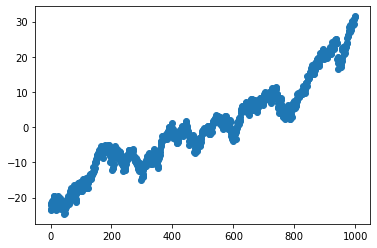

In [84]:
predicted = clf.predict(dependentVars)
residuals = results - predicted
plt.scatter(range(1000), residuals)
print('The mean of the residuals is:', np.mean(residuals), '. We can see that the residuals have zero mean.')
plt.show()

Based off of the graph, one can clearly see that each residual is not independent of each other, due to the strong correlation between the day and the residual. This strong correlation also violates the constant variance assumption, as there is a clear pattern to the residuals as a function of the day. Plugging in the residual data into a normality test produces an extremely low p-value, which further shows that this model should not be used as a predictor for the daily price of ETF. The Durbin Watson statistic discusses the independence and auto correlation while the fitted vs. residuals shows that constant variance i.e. homoscedasticity assumption is violated:

In [92]:
dw_stat = durbin_watson(resids=residuals)
print("The very low value of the Durbin Watson Statistic: ",dw_stat," \nThis states that the Data has very little auto-correlation.")

The very low value of the Durbin Watson Statistic:  0.005264754750982562  
This states that the Data has very little auto-correlation.


Text(0, 0.5, 'Residuals')

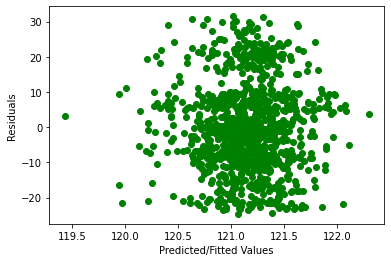

In [93]:
plt.scatter(predicted,residuals,color='green')

plt.xlabel("Predicted/Fitted Values")
plt.ylabel("Residuals")

## Overall Conclusion:

Based on our data analysis numerous conclusions were able to be made. For starters, prior to conducting our Shapiro-wilkis tests in section 2 all four columns seemed approximately normally distributed in the histograms in part 1. However once tested it was concluded that they were not normally distributed. When plotting the histograms of the mean standard deviation it was expected that it would model the standard deviation of the whole data but the CLT only applies if there are 30 or more samples in the data and in these cases there were only 10. As a result they were inconsistent with the CLT. It was also concluded that the population distribution had an impact on the sample means distribution. After conducting several other two tailed hypothesis tests it was concluded that there was no linear relationship between ETF and Gold. As for the residuals, due to the range being too broad (-30 to 30) the model doesn’t seem too reasonable since this model accounts for variation in the observed data.

## References:

1.) https://numpy.org/doc/

2.) https://www.scipy.org/

3.) https://pandas.pydata.org/docs/

4.) https://scikit-learn.org/stable/

5.) https://www.statisticssolutions.com/transforming-data-for-normality/

6.) https://towardsdatascience.com/verifying-the-assumptions-of-linear-regression-in-python-and-r-f4cd2907d4c0